7ма лабораториска вежба по предметот Податочно рударство

Изработиле: Јана Митровска (181080) и Бојан Петрушевски (162012)

Тема: Clustering

In [52]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from operator import sub
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate, GridSearchCV, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, classification_report, confusion_matrix, mean_squared_error, r2_score, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, LogisticRegression

In [27]:
data = pd.read_csv('/content/drive/MyDrive/netflix.csv')

In [28]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


In [29]:
data = data[['type', 'duration','release_year']].copy()

In [35]:
le = LabelEncoder()
data['type'] = le.fit_transform(data.type.values)

In [36]:
data.head()

,type,duration,release_year
0,1,4,2020
1,0,93,2016
2,0,78,2011
3,0,80,2009
4,0,123,2008


# **KMeans**

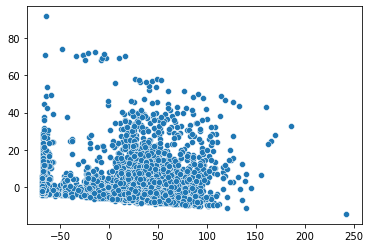

In [38]:
pca = PCA(n_components=2)
data_pca = pca.fit(data).transform(data)
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1])
plt.show()

In [50]:
def k_means(data, n_clusters):
  k_means = KMeans(n_clusters=n_clusters, max_iter=50, random_state=1)
  k_means.fit(data)
  labels = k_means.labels_
  centroids = k_means.cluster_centers_
  pd.DataFrame(centroids)

  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels)
  sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker="*",  s=500)
  plt.show()

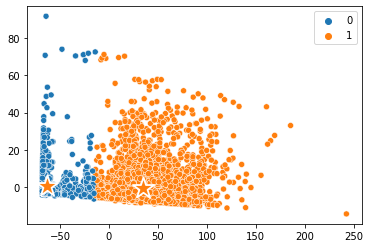

In [51]:
k_means(data_pca, 2)

Text(0, 0.5, 'SSE')

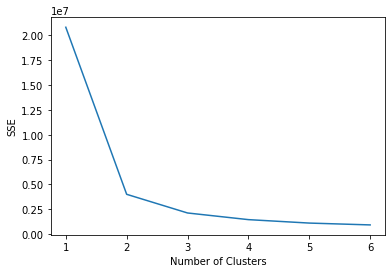

In [53]:
numClusters = 7
SSE = []
silhouette_coef = []
for k in range(1, numClusters):
  k_means = KMeans(n_clusters=k)
  k_means.fit(data)
  SSE.append(k_means.inertia_)
  if k<=1:
    continue
  score = silhouette_score(data, k_means.labels_)
  silhouette_coef.append(score)

plt.plot(range(1, numClusters),SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

# **Agglomerative Clustering**

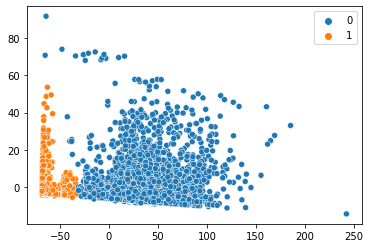

In [64]:
ac = AgglomerativeClustering(n_clusters=2).fit(data_pca)

sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=ac.labels_)
plt.show()

In [65]:
print(ac.n_clusters_)
print(ac.n_connected_components_)

2
1


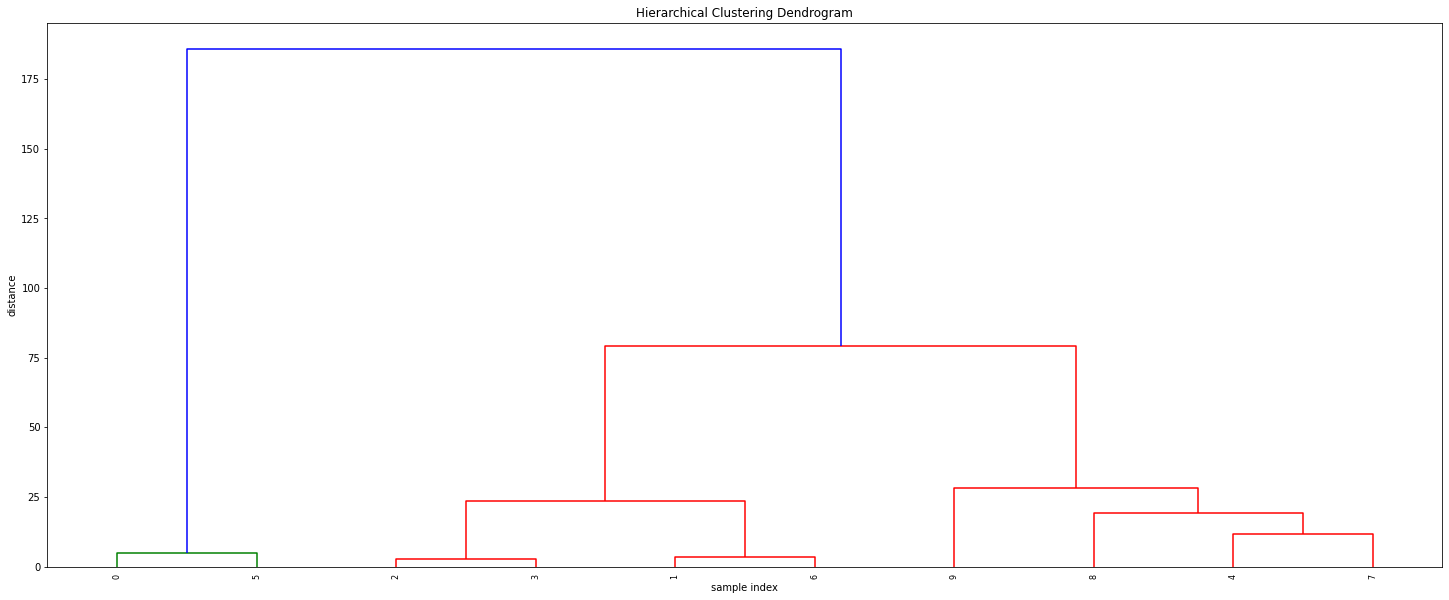

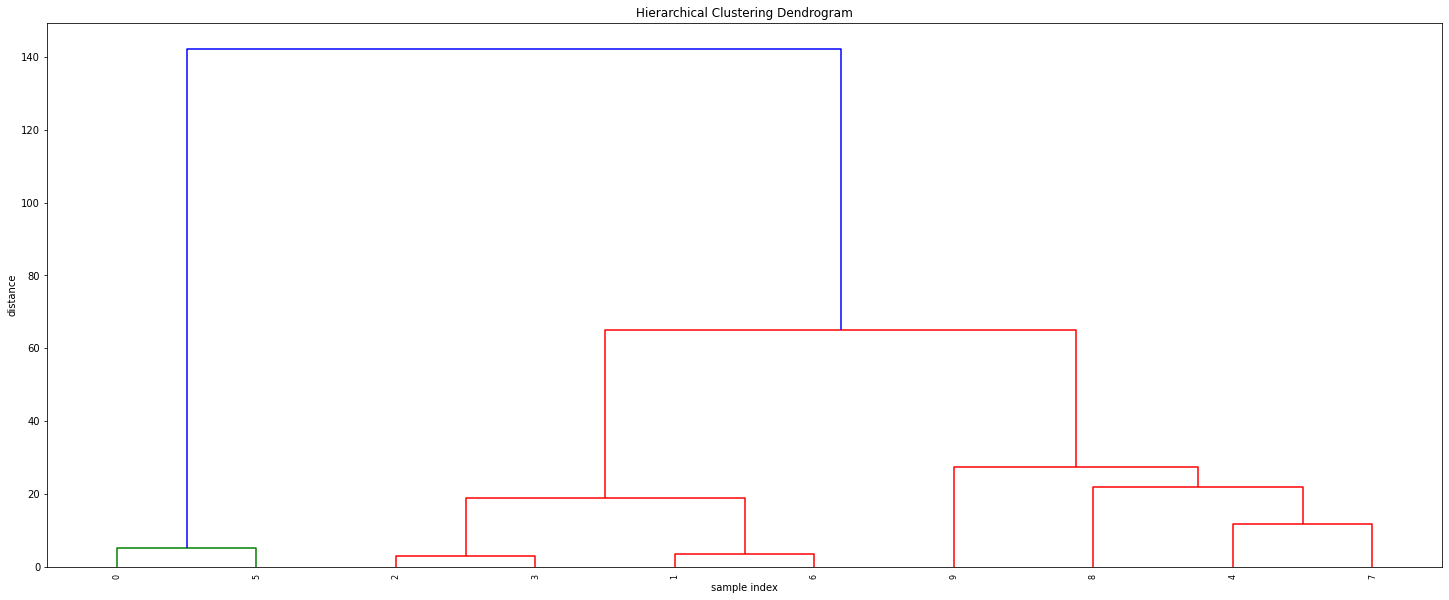

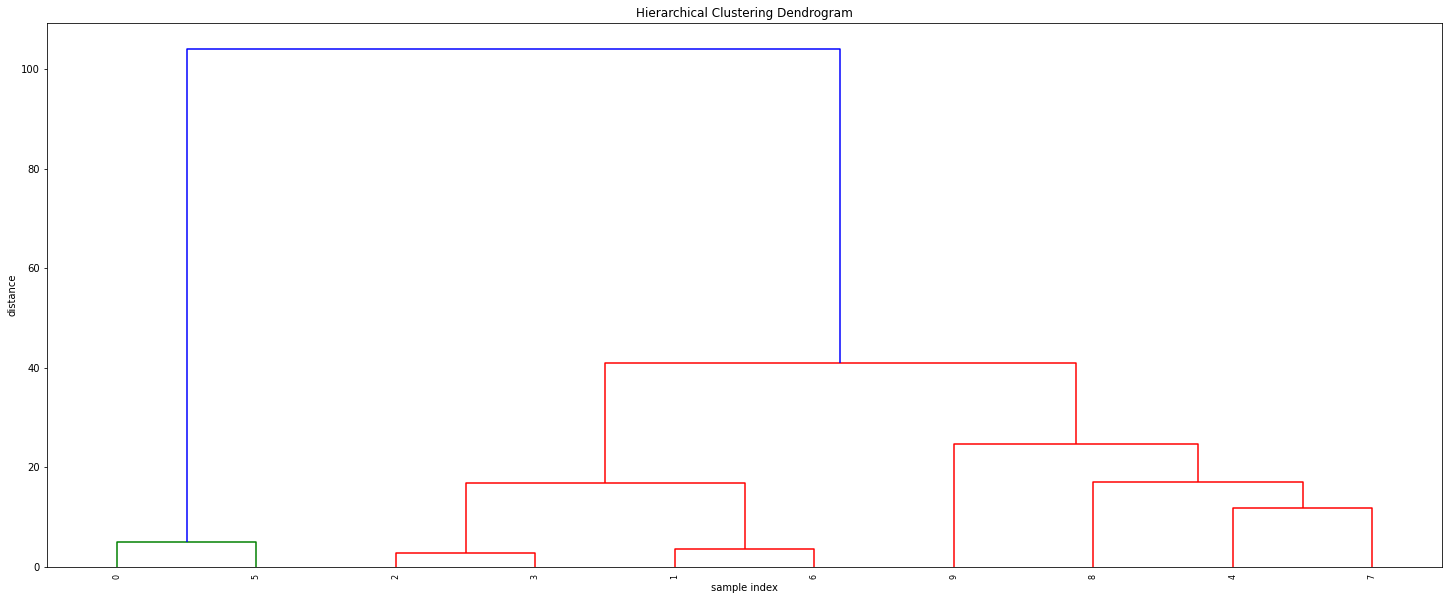

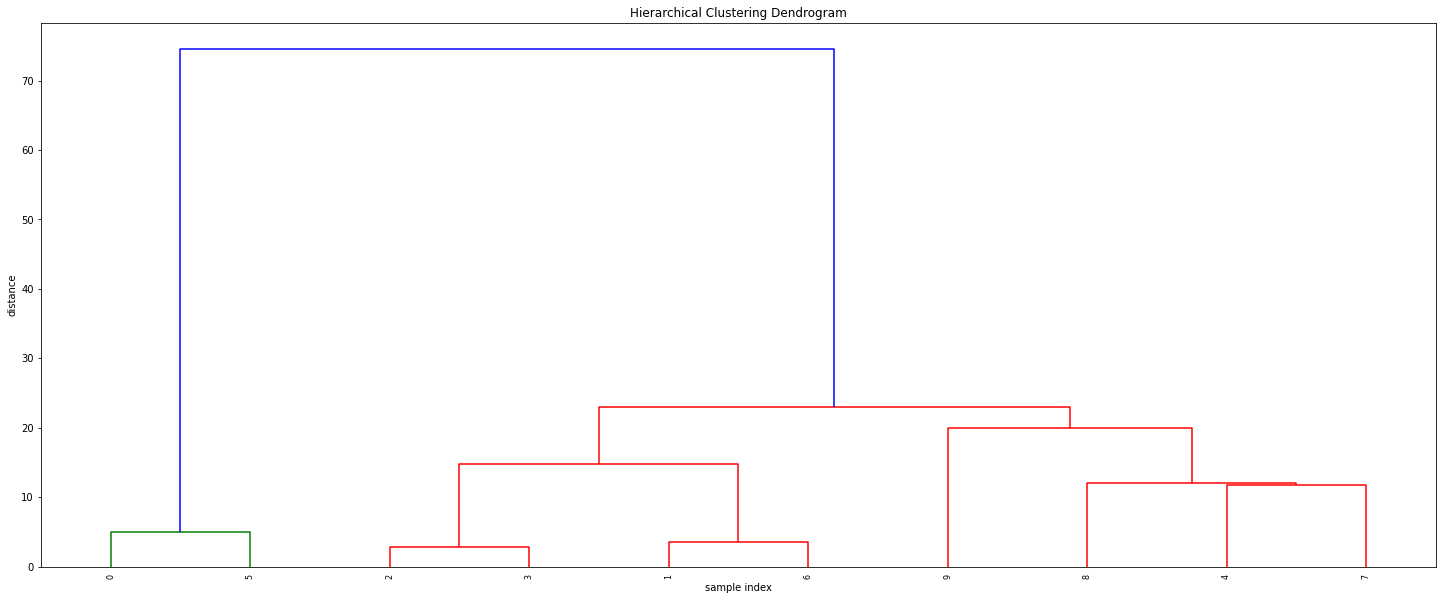

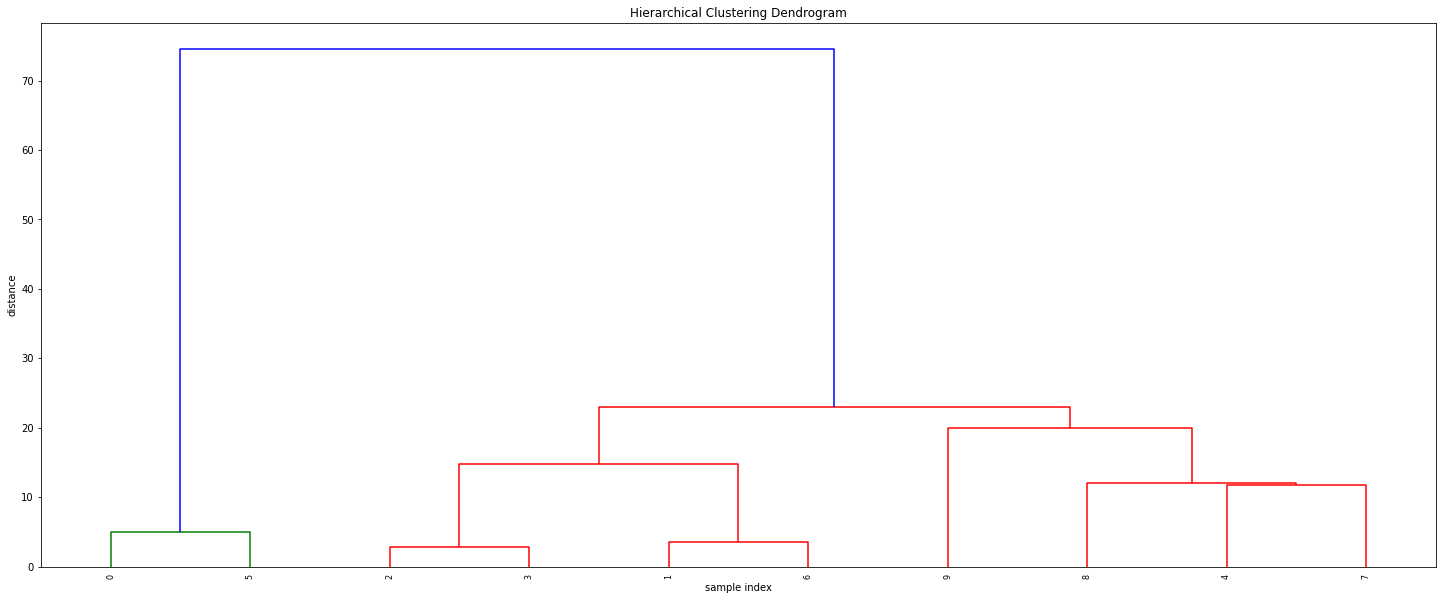

In [66]:
linkage_types = ['ward', 'complete', 'average', 'single']
for link_type in linkage_types:
  Z = linkage(data[:10], link_type)
  
  plt.figure(figsize=(25, 10))
  plt.title('Hierarchical Clustering Dendrogram')
  plt.xlabel('sample index')
  plt.ylabel('distance')

  dendrogram(Z, leaf_rotation=90., leaf_font_size=8.);
  plt.show();

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp');

# **DBSCAN**

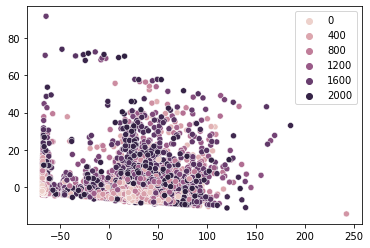

In [62]:
db = DBSCAN(eps=0.1, min_samples=1).fit(data_pca)

sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=db.labels_)

plt.show()